<a href="https://colab.research.google.com/github/Olga-geek/Python-Data-Science/blob/main/lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings

warnings.filterwarnings('ignore')

**Тема “Обучение без учителя”**
Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.



In [4]:
import numpy as np
import pandas as pd
import mat
import matplotlib.pyplot as plt


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [97]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Создайте датафреймы X и y из этих данных.

In [98]:
X = pd.DataFrame(boston.data, columns=feature_names)
y = boston.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.


In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.


In [102]:
from sklearn.manifold import TSNE
tsne = TSNE (n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print(f'До:\t{(X_train_scaled.shape)}')
print(f'После:\t{(X_train_tsne.shape)}')

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

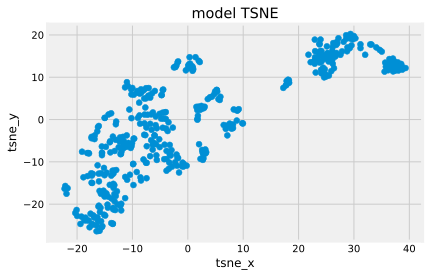

In [103]:
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.xlabel('tsne_x')
plt.ylabel('tsne_y')
plt.title('model TSNE')
plt.show()

**Задание 2**
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.




In [104]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
train_labels = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

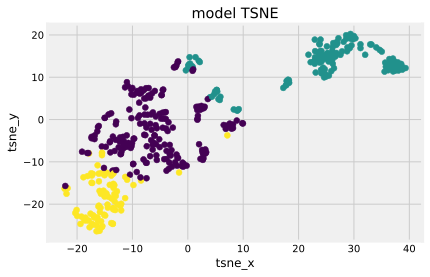

In [105]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.xlabel('tsne_x')
plt.ylabel('tsne_y')
plt.title('model TSNE')
plt.show()


Вычислите средние значения price и CRIM в разных кластерах.

In [109]:
print('средние значение price:')
print(f'Кластер 0 {y_train[train_labels==0].mean()}')
print(f'Кластер 1 {y_train[train_labels==1].mean()}')
print(f'Кластер 2 {y_train[train_labels==2].mean()}')

print('средние значение CRIM')
print('Кластер 0: {}'.format(X_train.loc[train_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[train_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[train_labels == 2, 'CRIM'].mean()))


средние значение price:
Кластер 0 24.958115183246072
Кластер 1 16.165354330708663
Кластер 2 27.78837209302326
средние значение CRIM
Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


***Задание 3**
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [112]:
test_labels = kmeans.fit_predict(X_test_scaled)
print('средние значение price:')
print(f'Кластер 0 {y_test[test_labels ==0].mean()}')
print(f'Кластер 1 {y_test[test_labels ==1].mean()}')
print(f'Кластер 2 {y_test[test_labels ==2].mean()}')

print('средние значение CRIM')
print('Кластер 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))


средние значение price:
Кластер 0 16.710526315789473
Кластер 1 22.690909090909095
Кластер 2 34.3111111111111
средние значение CRIM
Кластер 0: 9.419181842105264
Кластер 1: 0.21929690909090907
Кластер 2: 0.04070333333333334
